## ***MODELO APLICADO PREDICCIÓN PRECIO DE VIVIENDAS A LA VENTA***

Tras evaluar los diferentes modelos seleccionados con diferentes conjuntos de datos, finalmente el que tras diferentes pruebas presenta los mejores valores de evaluación ha sido el modelo:
* Linear Regressor sin procesar y sin Outliers

<br>

Procedemos a aplicar el modelo a los datos y crearemos nuestro dataset final para su uso en la visualización de datos. A partir del mismo podremos sacar conclusiones de rentabilidad de viviendas a la venta e identificaremos oportunidades de inversión.

### **Importamos las librerías y modulos necesarios**

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### **Leemos el fichero de datos sin outliers**

In [2]:
file_path = "../data/data_model_churriana_without_outliers.csv"
data = pd.read_csv(file_path, index_col = 0)

In [3]:
data.head()

,latitude,longitude,price,energy_certification,room_number,bath_number,has_garden,has_terrace,has_parking,has_swimmingpool,has_lift,constructed_area,is_new_development,is_needs_renovating,is_goog_condition
0,36.666638,-4.464576,395000,7,4,3,1.0,1.0,1.0,1.0,0.0,194,0,0,1
1,36.663719,-4.503897,640000,7,4,2,1.0,1.0,1.0,1.0,0.0,310,0,0,1
2,36.656894,-4.502930,567000,7,5,4,1.0,1.0,0.0,1.0,0.0,410,0,0,1
3,36.671190,-4.516900,375900,8,4,2,1.0,1.0,1.0,1.0,1.0,236,1,0,0
4,36.671190,-4.516900,249900,8,2,2,0.0,1.0,1.0,1.0,1.0,150,1,0,0


**Tabla para evaluación de los modelos**<br>
Creamos una tabla vacía con las siguientes columnas: 'Modelo', 'Detalles', 'R2 train', 'R2 test', 'MAE train' y 'MAE test'.
Aquí iremos agregando los resultados de cada modelo para finalmente de un simple vistazo poder comparar los rendimientos que aportan y quedarnos con uno de ellos.

In [4]:
resultados = pd.DataFrame({
    'Modelo':[],
    'Detalles':[],
    'R2 train':[],
    'R2 test':[],
    'MAE train':[],
    'MAE test':[]
})

Definimos dos funciones que nos ayudarán a evaluar posteriormente el rendimiento de los modelos.

In [5]:
def error_absoluto_medio(y,y_pred):
    v = np.abs(y - y_pred)
    return v.sum()/len(y)
    
def error_gen(y_train,y_pred_train,y_test,y_pred_test):
    MAE_TRAIN = error_absoluto_medio(y_train,y_pred_train)
    MAE_TEST = error_absoluto_medio(y_test,y_pred_test)
    return MAE_TRAIN,MAE_TEST

#### **Regresión Lineal**

In [6]:
#definimos las variables den entrada y salida.
x = data.drop('price',axis=1)
y = data['price']

#### **División de datos en Train y Test**

In [7]:
#dividimos el conjunto
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [8]:
#definimos la instancia
lr = LinearRegression()

In [9]:
#Entrenamos los datos de prueba
lr.fit(x_train,y_train)

LinearRegression()

In [10]:
#metricas de evaluación
r2_train = lr.score(x_train,y_train)
r2_test = lr.score(x_test,y_test)

In [11]:
#aplicamos el modelo
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

In [12]:
MAE_train = error_absoluto_medio(y_train,y_train_pred)
    
MAE_test = error_absoluto_medio(y_test,y_test_pred)

r2_train,r2_test,MAE_train,MAE_test



final = resultados.shape[0]
resultados.loc[final] = ['Regresión Lineal','Sin procesar',r2_train,r2_test,MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar,0.802411,0.680753,59495.727803,73318.078057


**Valores residuales**

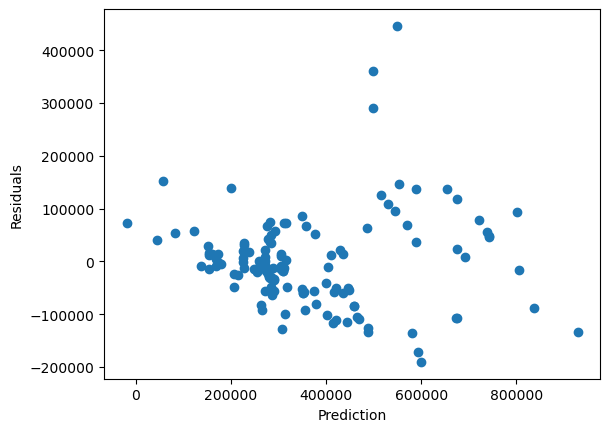

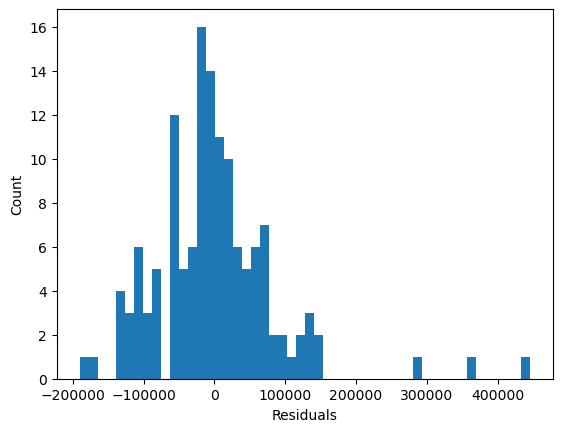

In [13]:
residuals = y_train - y_train_pred

# Gráfico de los residuos
plt.scatter(y_train_pred, residuals)
plt.xlabel("Prediction")
plt.ylabel("Residuals")
plt.show()

# Verificación de la normalidad de los residuos
plt.hist(residuals, bins=50)
plt.xlabel("Residuals")
plt.ylabel("Count")
plt.show()

**Validación cruzada**<br>
Los resultados no son todo lo buenos que nos gustaría pero son aceptables, obtenemos una precisión del 75% y una desviación estandar del 15%.

In [14]:
from sklearn.model_selection import cross_val_score

# Ejecución de la validación cruzada con 10 folds
scores = cross_val_score(lr, x_train, y_train, cv=3)

# Imprimir la precisión promedio y la desviación estándar
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.75 (+/- 0.15)


**Visualización de los resultados:**

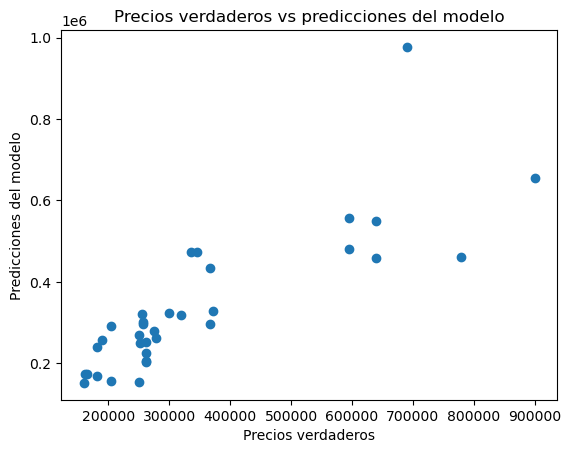

In [15]:
plt.scatter(y_test, y_test_pred)
plt.xlabel("Precios verdaderos")
plt.ylabel("Predicciones del modelo")
plt.title("Precios verdaderos vs predicciones del modelo")
plt.show()

Valores predichos que produjo el modelo en relación con cada característica:

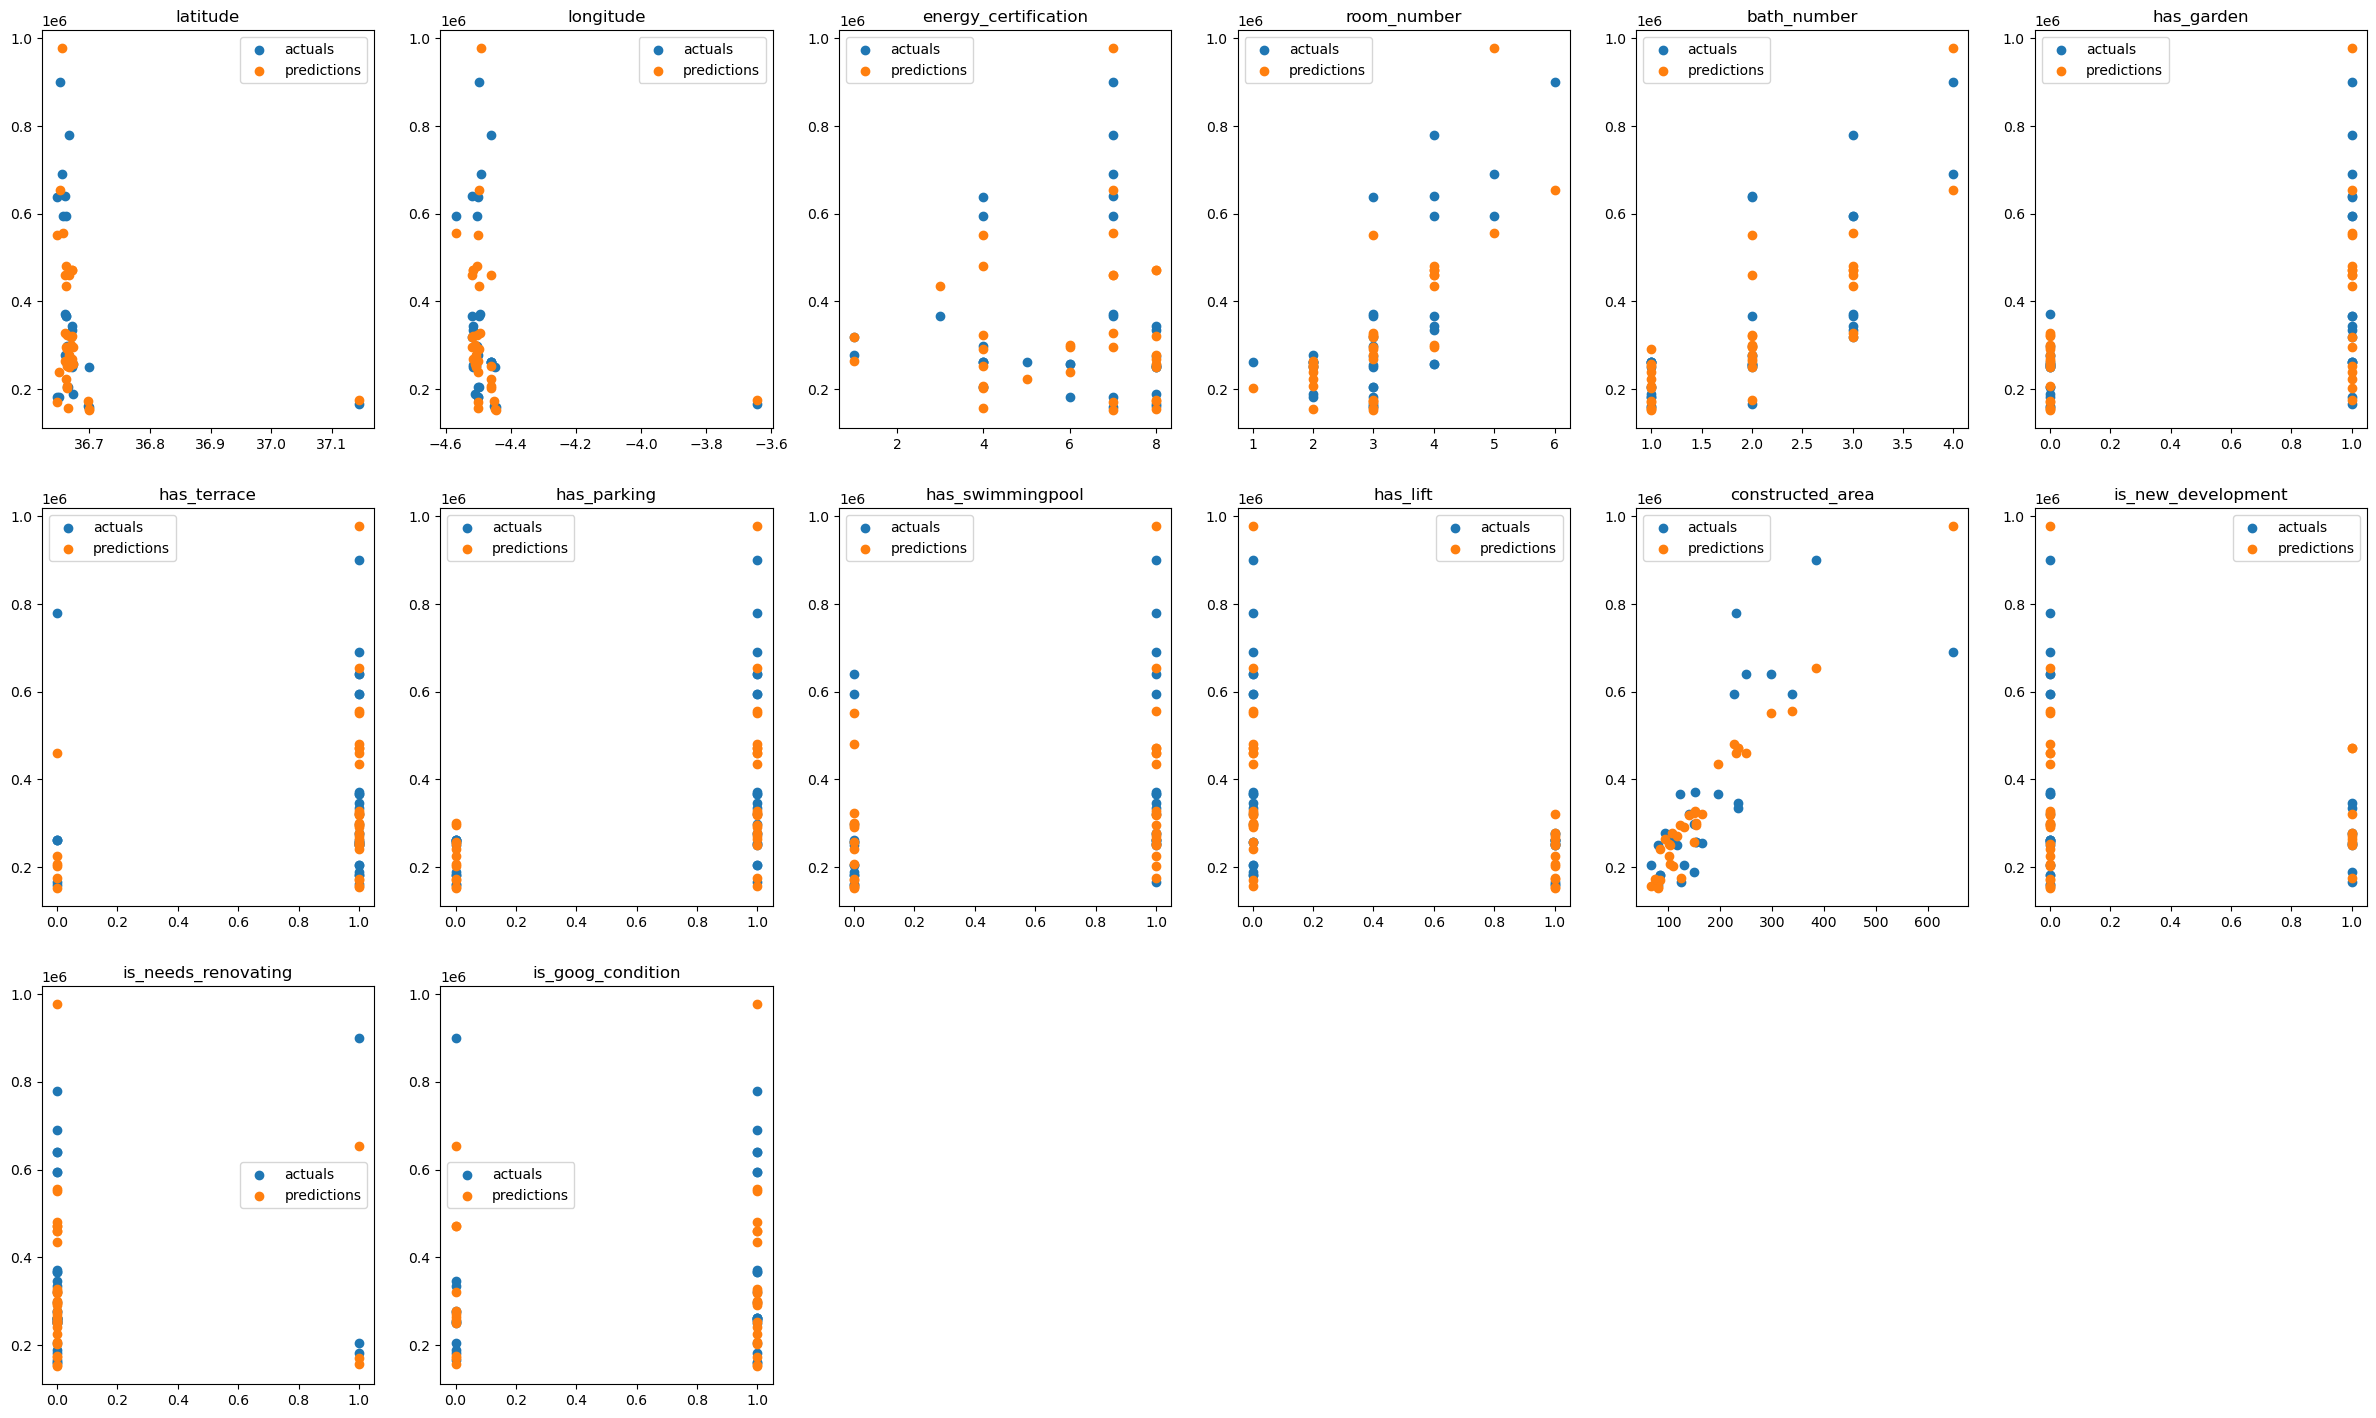

In [16]:
fig = plt.figure(figsize=(30,30))

columns = x_test.columns

for c, num in zip(columns, range(0,14)):
    ax = fig.add_subplot(5, 6, num+1)
    ax.scatter(x_test[c], y_test)
    ax.scatter(x_test[c], y_test_pred)
    ax.set_title(c)
    ax.legend(['actuals', 'predictions'])
    
plt.savefig('../graficas/variables_pred.png')
plt.show()

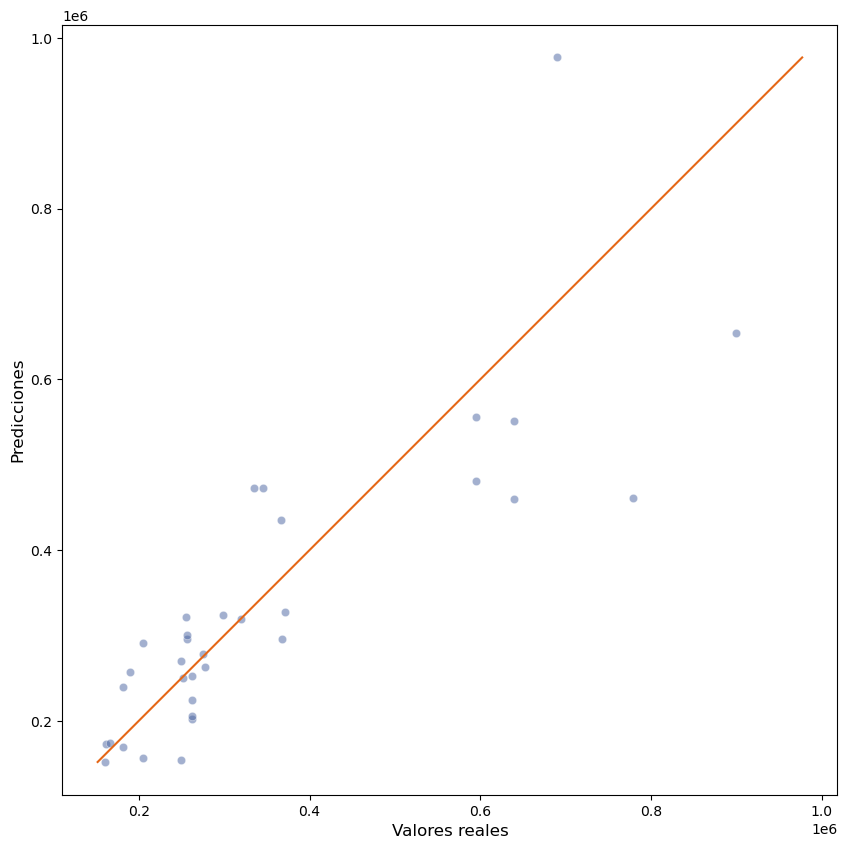

In [17]:
plt.style.use("tableau-colorblind10")
plt.figure(figsize=(10,10))

sns.scatterplot(x=y_test, y=y_test_pred, color='#4863A0', alpha=0.5)

p1 = max(max(y_test_pred), max(y_test))
p2 = min(min(y_test_pred), min(y_test))
sns.lineplot(x=[p1, p2], y=[p1, p2], color='#E56717')

plt.xlabel('Valores reales', fontsize=12)
plt.ylabel('Predicciones', fontsize=12)
plt.axis('equal')

plt.savefig('../graficas/modelo_pred.png')
plt.show()

A partir del gráfico de dispersión anterior de los valores reales frente a los previstos, es posible sacar las siguientes conclusiones:

* Cuanto más cerca estén los puntos de dispersión de la línea de regresión, mejor será el modelo. El R² obtenido fue de 0,8138, que es un puntaje relativamente aceptable. Esto da como resultado que todos los puntos estén cerca de la línea diagonal. 
* Si analizamos más a fondo los valores, podemos concluir que cuanto más alto es el precio de la vivienda, más disperso es el modelo. Esta afirmación puede deberse a la poca cantidad de datos para viviendas con precios superiores, por lo que era de esperar que el modelo ajustara mejor los precios de viviendas medias y no de lujo: superiores al millón de euros.

En cualquier caso, el rendimiento de nuestro modelo será más que aceptable ya que los puntos se ajustan a la recta de regresión y el valor de R² es cercano al 82% de efectividad.

In [18]:
y_test_pred

array([169874.43756573, 249726.31084459, 278473.85195442, 472386.19628935,
       154349.68977301, 556189.62006944, 224275.99558058, 173333.76855753,
       252568.97550251, 295664.56916952, 472386.19628935, 654431.1631155 ,
       976935.50922246, 459644.29361843, 263117.72985242, 323882.7755713 ,
       174507.4130303 , 151880.31387912, 327843.35538058, 256925.25987731,
       202714.72396851, 434856.85161246, 321415.38225403, 300443.31454234,
       550693.60352619, 295706.80185162, 481018.30381781, 156837.48574199,
       319685.33380002, 290697.86944816, 206180.12968673, 240199.52011193,
       460474.16213079, 269881.60570598])

In [19]:
data_pred = lr.predict(x)

In [20]:
data['Price_predict'] = data_pred

In [21]:
data.head()

,latitude,longitude,price,energy_certification,room_number,bath_number,has_garden,has_terrace,has_parking,has_swimmingpool,has_lift,constructed_area,is_new_development,is_needs_renovating,is_goog_condition,Price_predict
0,36.666638,-4.464576,395000,7,4,3,1.0,1.0,1.0,1.0,0.0,194,0,0,1,448825.959564
1,36.663719,-4.503897,640000,7,4,2,1.0,1.0,1.0,1.0,0.0,310,0,0,1,531123.657104
2,36.656894,-4.502930,567000,7,5,4,1.0,1.0,0.0,1.0,0.0,410,0,0,1,674218.857272
3,36.671190,-4.516900,375900,8,4,2,1.0,1.0,1.0,1.0,1.0,236,1,0,0,459480.051717
4,36.671190,-4.516900,249900,8,2,2,0.0,1.0,1.0,1.0,1.0,150,1,0,0,279784.397007


In [22]:
data['Var_Prices'] = data['Price_predict'] - data['price'] 

In [23]:
data['%_rentabilidad'] = (data['Var_Prices']/data['price'])*100

Todos los datos en negativo son viviendas en las que su precio actual por las que están a la venta está por debajo del precio predicho por lo cual son una oportunidad de inversión 

In [24]:
data.head()

,latitude,longitude,price,energy_certification,room_number,bath_number,has_garden,has_terrace,has_parking,has_swimmingpool,has_lift,constructed_area,is_new_development,is_needs_renovating,is_goog_condition,Price_predict,Var_Prices,%_rentabilidad
0,36.666638,-4.464576,395000,7,4,3,1.0,1.0,1.0,1.0,0.0,194,0,0,1,448825.959564,53825.959564,13.626825
1,36.663719,-4.503897,640000,7,4,2,1.0,1.0,1.0,1.0,0.0,310,0,0,1,531123.657104,-108876.342896,-17.011929
2,36.656894,-4.502930,567000,7,5,4,1.0,1.0,0.0,1.0,0.0,410,0,0,1,674218.857272,107218.857272,18.909851
3,36.671190,-4.516900,375900,8,4,2,1.0,1.0,1.0,1.0,1.0,236,1,0,0,459480.051717,83580.051717,22.234651
4,36.671190,-4.516900,249900,8,2,2,0.0,1.0,1.0,1.0,1.0,150,1,0,0,279784.397007,29884.397007,11.958542


In [25]:
data.to_csv('../data/datos_finales_visualizacion.csv', index=False)

In [26]:
file_path = "../data/datos_finales_visualizacion.csv"
data = pd.read_csv(file_path)

In [27]:
file_path = "../data/clean_properties_churriana_without_outliers.csv"
data_inicial = pd.read_csv(file_path)

In [28]:
data_inicial

,Unnamed: 0,titulo,localizacion,latitude,longitude,price,energy_certification,room_number,bath_number,has_garden,has_terrace,has_parking,has_swimmingpool,has_lift,constructed_area,is_new_development,is_needs_renovating,is_goog_condition
0,0,Chalet adosado en venta en Guadalmar,"Churriana, Málaga",36.666638,-4.464576,395000,inProcess,4,3,1.0,1.0,1.0,1.0,0.0,194,0,0,1
1,1,Casa o chalet independiente en venta en calle ...,"Churriana-El Pizarrillo-La Noria-Guadalsol, Má...",36.663719,-4.503897,640000,inProcess,4,2,1.0,1.0,1.0,1.0,0.0,310,0,0,1
2,2,Casa o chalet independiente en venta en calle ...,"Cortijo de Maza-Finca Monsalvez-El Olivar, Málaga",36.656894,-4.502930,567000,inProcess,5,4,1.0,1.0,0.0,1.0,0.0,410,0,0,1
3,3,"Ático en venta en calle Bangladesh, 25","Churriana-El Pizarrillo-La Noria-Guadalsol, Má...",36.671190,-4.516900,375900,unknown,4,2,1.0,1.0,1.0,1.0,1.0,236,1,0,0
4,4,"Piso en venta en calle Bangladesh, 25","Churriana-El Pizarrillo-La Noria-Guadalsol, Má...",36.671190,-4.516900,249900,unknown,2,2,0.0,1.0,1.0,1.0,1.0,150,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,182,Chalet adosado en venta en calle Malasia,"Churriana-El Pizarrillo-La Noria-Guadalsol, Má...",36.669872,-4.519457,320000,b,3,3,1.0,1.0,1.0,1.0,0.0,140,0,0,1
166,183,Chalet adosado en venta en calle Isabel Barreto,"Cortijo de Maza-Finca Monsalvez-El Olivar, Málaga",36.661758,-4.504469,595000,e,4,3,1.0,1.0,1.0,0.0,0.0,226,0,0,1
167,184,Casa o chalet independiente en venta en calle ...,"Churriana-El Pizarrillo-La Noria-Guadalsol, Má...",36.664690,-4.519482,640000,unknown,4,2,1.0,1.0,1.0,1.0,0.0,310,0,0,1
168,185,Dúplex en venta en calle Tanzania,"Churriana-El Pizarrillo-La Noria-Guadalsol, Má...",36.661137,-4.519971,367500,inProcess,3,2,1.0,1.0,1.0,1.0,0.0,123,0,0,1


In [29]:
data_final = pd.concat([data, data_inicial[['titulo', 'localizacion']]], axis=1)


In [30]:
data_final = data_final[["titulo", "localizacion", "latitude", "longitude", "price", "energy_certification", "room_number", "bath_number", "has_garden", "has_terrace", "has_parking", "has_swimmingpool", "has_lift", "constructed_area",
            "is_new_development", "is_needs_renovating", "is_goog_condition", "Price_predict", "Var_Prices", "%_rentabilidad"]]

In [31]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   titulo                170 non-null    object 
 1   localizacion          170 non-null    object 
 2   latitude              170 non-null    float64
 3   longitude             170 non-null    float64
 4   price                 170 non-null    int64  
 5   energy_certification  170 non-null    int64  
 6   room_number           170 non-null    int64  
 7   bath_number           170 non-null    int64  
 8   has_garden            170 non-null    float64
 9   has_terrace           170 non-null    float64
 10  has_parking           170 non-null    float64
 11  has_swimmingpool      170 non-null    float64
 12  has_lift              170 non-null    float64
 13  constructed_area      170 non-null    int64  
 14  is_new_development    170 non-null    int64  
 15  is_needs_renovating   1

In [32]:
data_final.to_csv('../data/datos_finales_visualizacion.csv', index=False)

### **Guardamos el modelo usando la libreria Pickle para usarla en nuestro archivo py para la app de Streamlit**

In [34]:
import pickle